In [17]:
# Cell 2: Converting the shell command to a python method- runAlgorithm


import subprocess
import shlex


def runAlgorithm(**kwargs):
    
    # Default arguments of the method:
    default_args = {'type': 'gen', 'graph': "flower 1000 1 2", 'method': 'sketch', 'alpha': '1', 'least_coverage': '1',
           'sketch_k': '128', 'multipass': '10000', 'rad_min': '1', 'rad_max': '30', 'random_seed': '114514'}
    
    options = ""
    
    for key in kwargs:
        default_args[key] = kwargs[key]
        
    if default_args['type'] == 'gen':
        a = default_args['graph']
        default_args['graph'] = f'"{a}"'
            
    for key in default_args:
        options += f" -{key}={default_args[key]}"
        
    subprocess.run(shlex.split(f"./bin/box_cover {options}"), cwd='./graph_sketch_fractality')

In [31]:
import graph_tool.all as gt
import csv
import traceback
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [6]:
netscience_graph = gt.collection.ns["twitter"]

In [8]:
if "weight" not in netscience_graph.edge_properties:
    netscience_graph.edge_properties["weight"] = netscience_graph.new_edge_property("int", val=-1)
else:
    netscience_graph.ep.weight.a *= -1

netscience_graph.ep.weight[netscience_graph.edges().next()]

-1

In [9]:
max_span_tree = gt.min_spanning_tree(netscience_graph, netscience_graph.ep.weight)
mst_graph = gt.GraphView(netscience_graph, efilt=max_span_tree)

In [10]:
mst_graph.num_edges

<bound method Graph.num_edges of <GraphView object, directed, with 465017 vertices and 465016 edges, 1 internal vertex property, 1 internal edge property, 7 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7faeba637af0, at 0x7fb01beffc40>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7faeba637af0, at 0x7fb01befceb0>, False), at 0x7faeba637af0>>

In [11]:
netscience_graph.num_edges

<bound method Graph.num_edges of <Graph object, directed, with 465017 vertices and 834797 edges, 1 internal vertex property, 1 internal edge property, 7 internal graph properties, at 0x7fb01befffd0>>

In [12]:
def saveTSV(filePath, graph):
    with open(filePath, "w", newline="") as tsvfile:
        writer = csv.writer(tsvfile, delimiter="\t")
        # Write header row
        # writer.writerow(["source", "target", "source_name", "target_name", "edge_weight"])

        for e in graph.edges():
            source = e.source()
            target = e.target()
            # source_name = graph.vertex_properties["name"][source]
            # target_name = graph.vertex_properties["name"][target]
            # edge_weight = graph.edge_properties["weight"][e]
            writer.writerow([source, target
                            #  , source_name, target_name, edge_weight
                             ])

In [13]:
saveTSV(filePath='./twitter.tsv', graph=netscience_graph)

In [14]:
import datetime

try:
    runAlgorithm(type = 'tsv',graph = "../twitter.tsv")
    endDate = datetime.datetime.now()
except:
    error = traceback.format_exc()
    log_string = f'Faced error: \n{error}'
    endDate = datetime.datetime.now()


[0212 09:17:48] JLOG: box_cover.9f89a6ef4075.jlog.250212-091748.10722
[0212 09:17:48] run.program = box_cover
[0212 09:17:48] run.args = ./bin/box_cover
[0212 09:17:48] run.args = -type=tsv
[0212 09:17:48] run.args = -graph=../twitter.tsv
[0212 09:17:48] run.args = -method=sketch
[0212 09:17:48] run.args = -alpha=1
[0212 09:17:48] run.args = -least_coverage=1
[0212 09:17:48] run.args = -sketch_k=128
[0212 09:17:48] run.args = -multipass=10000
[0212 09:17:48] run.args = -rad_min=1
[0212 09:17:48] run.args = -rad_max=30
[0212 09:17:48] run.args = -random_seed=114514
[0212 09:17:48] run.machine = 9f89a6ef4075
[0212 09:17:48] run.date = 2025/02/12 09:17:48
[0212 09:17:48] run.user = =========
  Vertices: 465017
  Edges: 1667080
  Type: agl::basic_graph<int>
----------
  0 -> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...
  1 -> 0
  2 -> 0, 4722, 318852
  3 -> 0, 5647, 11629, 33380, 36930, 50643, 57673
  4 -> 0, 9285, 10293, 23718, 28342, 37713, 42833, 43067, 72518, 73991, ...
  ...
----------
  0 <- 1

In [20]:
endDate

datetime.datetime(2025, 2, 12, 9, 36, 52, 620618)

In [25]:
# Cell 4: printing the results

import glob
import os
import json


list_of_files = glob.glob('./graph_sketch_fractality/jlog/*')
latest_file = max(list_of_files, key=os.path.getctime)

f = open(latest_file, "r").read()
json_file = json.loads(f)

radius = json_file['radius']
size = json_file['size']

print (f"radius: \n{radius}\n")
print (f"size: \n{size}")
json_file
# json_file

radius: 
[1, 2, 3, 4, 5]

size: 
[2445, 356, 46, 5, 1]


{'run': {'program': 'box_cover',
  'args': ['./bin/box_cover',
   '-type=tsv',
   '-graph=../twitter.tsv',
   '-method=sketch',
   '-alpha=1',
   '-least_coverage=1',
   '-sketch_k=128',
   '-multipass=10000',
   '-rad_min=1',
   '-rad_max=30',
   '-random_seed=114514'],
  'machine': '9f89a6ef4075',
  'date': '2025/02/12',
  'user': '',
  'pid': 10722,
  'time': 1143.8,
  'memory': 3341381632},
 'graph_info': [{'vertices': 465017,
   'edges': 1667080,
   'graph': '../twitter.tsv'}],
 'name': 'sketch-k.128',
 'k': '128',
 'pass': '10000',
 'alpha': '1.000000',
 'time': [1.74257, 233.233, 247.367, 372.086, 288.517],
 'size': [2445, 356, 46, 5, 1],
 'radius': [1, 2, 3, 4, 5],
 'coverage': [1, 1, 1, 1, 1],
 'centers': [{'1': [642,
    6388,
    3579,
    16758,
    11633,
    18227,
    169,
    45064,
    10268,
    20595,
    13853,
    6698,
    13912,
    30719,
    72331,
    30635,
    13921,
    31541,
    75152,
    64481,
    6991,
    30740,
    63053,
    8827,
    91650,
    12

In [24]:
box_sizes = [2 * rb + 1 for rb in radius]

In [26]:
x = np.array(box_sizes)
y = np.array(size)
x_log = np.log10(box_sizes)
y_log = np.log10(size)

In [28]:
fit_pl = linregress(x_log, y_log)
fit_exp = linregress(x, y_log)

In [29]:
y_log_pl = fit_pl.slope * x_log + fit_pl.intercept
y_log_exp = fit_exp.slope * x + fit_exp.intercept

In [30]:
x_plot = np.linspace(x.min(), x.max(), 100) # 
x_log_plot = np.log10(x_plot) # 
y_log_exp_plot = fit_exp.slope * x_plot + fit_exp.intercept

In [32]:
#marker='o', markersize=10, color=color, markerfacecolor=color_pale, markeredgewidth=linewidth, markeredgecolor=color, linewidth=linewidth

def set_plotting_style():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markeredgewidth'] = 2
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['font.size'] = 20
    plt.rcParams['legend.fontsize'] = 20 * 0.6
    plt.rcParams['figure.subplot.left'] = 0.25
    plt.rcParams['figure.subplot.right'] = 0.95
    plt.rcParams['figure.subplot.bottom'] = 0.2
    plt.rcParams['figure.subplot.top'] = 0.9
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['xtick.major.size'] = 8
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['ytick.left'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.minor.size'] = 4
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['ytick.major.size'] = 8
    plt.rcParams['ytick.major.width'] = 2

In [33]:
set_plotting_style()

#plt.rcParams['font.size'] = 18
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['axes.linewidth'] = 2

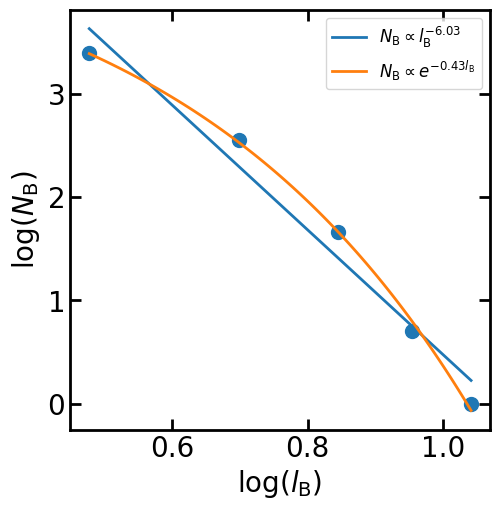

In [35]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_log, y_log)
plt.plot(x_log, y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_log_plot, y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xlabel('$\log(l_\mathrm{B})$')
plt.ylabel('$\log(N_\mathrm{B})$')
plt.legend()

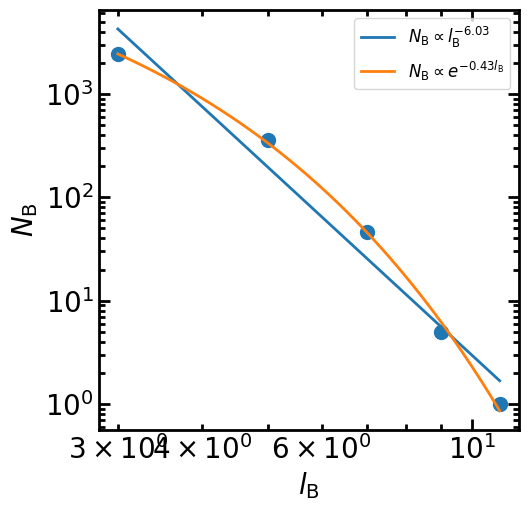

In [36]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, 10**y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_plot, 10**y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$l_\mathrm{B}$')
plt.ylabel('$N_\mathrm{B}$')
plt.legend()
plt.show()

In [ ]:
def wmse(y_fit, x=x_log, y=y_log, w=size):
    return sum(w * (y_fit - y) ** 2) / sum(w) / len(y_fit)

In [43]:
wmse_pl = wmse(y_fit=y_log_pl)
wmse_pl

0.011730671260723406

In [44]:
wmse_exp = wmse(y_fit=y_log_exp)
wmse_exp

2.4453575109421997e-05

In [45]:
wmse_pl / wmse_exp

479.7119115807145

## Same for the Span tree

In [47]:
saveTSV(filePath='./twitter_tree.tsv', graph=mst_graph)

In [48]:
import datetime

try:
    runAlgorithm(type = 'tsv',graph = "../twitter_tree.tsv")
    endDate = datetime.datetime.now()
except:
    error = traceback.format_exc()
    log_string = f'Faced error: \n{error}'
    endDate = datetime.datetime.now()


[0213 01:40:31] JLOG: box_cover.9f89a6ef4075.jlog.250213-014031.10773
[0213 01:40:31] run.program = box_cover
[0213 01:40:31] run.args = ./bin/box_cover
[0213 01:40:31] run.args = -type=tsv
[0213 01:40:31] run.args = -graph=../twitter_tree.tsv
[0213 01:40:31] run.args = -method=sketch
[0213 01:40:31] run.args = -alpha=1
[0213 01:40:31] run.args = -least_coverage=1
[0213 01:40:31] run.args = -sketch_k=128
[0213 01:40:31] run.args = -multipass=10000
[0213 01:40:31] run.args = -rad_min=1
[0213 01:40:31] run.args = -rad_max=30
[0213 01:40:31] run.args = -random_seed=114514
[0213 01:40:31] run.machine = 9f89a6ef4075
[0213 01:40:31] run.date = 2025/02/13 01:40:31
[0213 01:40:31] run.user = =========
  Vertices: 465017
  Edges: 930032
  Type: agl::basic_graph<int>
----------
  0 -> 1, 3, 7, 8, 9, 10, 15, 16, 18, 19, ...
  1 -> 0
  2 -> 318852
  3 -> 0
  4 -> 274168
  ...
----------
  0 <- 1, 3, 7, 8, 9, 10, 15, 16, 18, 19, ...
  1 <- 0
  2 <- 318852
  3 <- 0
  4 <- 274168
  ...
  Vertices: 46

In [49]:
import glob
import os
import json


list_of_files = glob.glob('./graph_sketch_fractality/jlog/*')
latest_file = max(list_of_files, key=os.path.getctime)

f = open(latest_file, "r").read()
json_file = json.loads(f)

radius = json_file['radius']
size = json_file['size']

print (f"radius: \n{radius}\n")
print (f"size: \n{size}")
json_file

radius: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

size: 
[2489, 1566, 831, 549, 300, 200, 146, 93, 68, 48, 36, 25, 18, 15, 10, 9, 7, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 1]


{'run': {'program': 'box_cover',
  'args': ['./bin/box_cover',
   '-type=tsv',
   '-graph=../twitter_tree.tsv',
   '-method=sketch',
   '-alpha=1',
   '-least_coverage=1',
   '-sketch_k=128',
   '-multipass=10000',
   '-rad_min=1',
   '-rad_max=30',
   '-random_seed=114514'],
  'machine': '9f89a6ef4075',
  'date': '2025/02/13',
  'user': '',
  'pid': 10773,
  'time': 5599.45,
  'memory': 3306033152},
 'graph_info': [{'vertices': 465017,
   'edges': 930032,
   'graph': '../twitter_tree.tsv'}],
 'name': 'sketch-k.128',
 'k': '128',
 'pass': '10000',
 'alpha': '1.000000',
 'time': [1.12876,
  231.219,
  235.089,
  219.17,
  189.061,
  192.708,
  179.442,
  183,
  180.373,
  191.621,
  192.419,
  190.979,
  186.44,
  200.447,
  200.363,
  188.636,
  209.673,
  217.016,
  222.625,
  232.176,
  227.545,
  222.398,
  221.31,
  236.38,
  241.096,
  236.829,
  206.333,
  163.355],
 'size': [2489,
  1566,
  831,
  549,
  300,
  200,
  146,
  93,
  68,
  48,
  36,
  25,
  18,
  15,
  10,
  9,
  7

In [50]:
box_sizes = [2 * rb + 1 for rb in radius]

In [51]:
x = np.array(box_sizes)
y = np.array(size)
x_log = np.log10(box_sizes)
y_log = np.log10(size)

In [52]:
fit_pl = linregress(x_log, y_log)
fit_exp = linregress(x, y_log)

In [53]:
y_log_pl = fit_pl.slope * x_log + fit_pl.intercept
y_log_exp = fit_exp.slope * x + fit_exp.intercept

In [54]:
x_plot = np.linspace(x.min(), x.max(), 100) # 
x_log_plot = np.log10(x_plot) # 
y_log_exp_plot = fit_exp.slope * x_plot + fit_exp.intercept

In [55]:
set_plotting_style()

#plt.rcParams['font.size'] = 18
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['axes.linewidth'] = 2

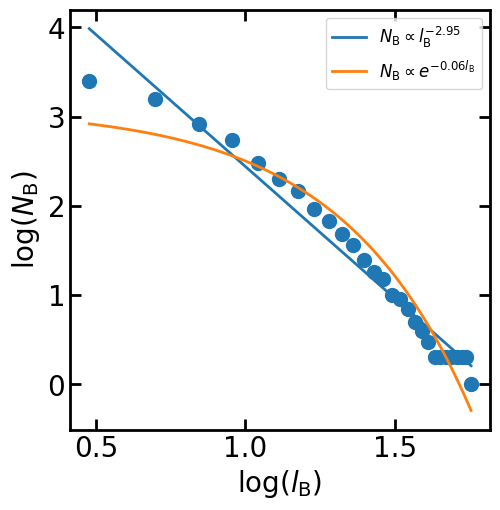

In [56]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_log, y_log)
plt.plot(x_log, y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_log_plot, y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xlabel('$\log(l_\mathrm{B})$')
plt.ylabel('$\log(N_\mathrm{B})$')
plt.legend()

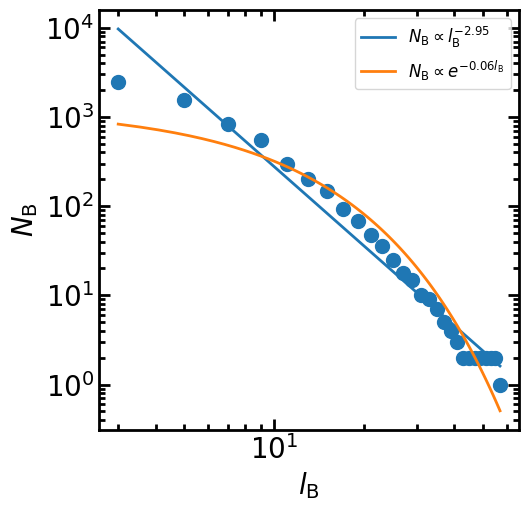

In [57]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, 10**y_log_pl, label='$N_\mathrm{B}\propto l_\mathrm{B}^{%.2f}$' %fit_pl.slope)
plt.plot(x_plot, 10**y_log_exp_plot, label='$N_\mathrm{B}\propto e^{%.2f l_\mathrm{B}}$' %fit_exp.slope)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$l_\mathrm{B}$')
plt.ylabel('$N_\mathrm{B}$')
plt.legend()
plt.show()

In [58]:
def wmse(y_fit, x=x_log, y=y_log, w=size):
    return sum(w * (y_fit - y) ** 2) / sum(w) / len(y_fit)

In [59]:
wmse_pl = wmse(y_fit=y_log_pl)
wmse_pl

0.005242662094651495

In [60]:
wmse_exp = wmse(y_fit=y_log_exp)
wmse_exp

0.004912883361632903

In [61]:
wmse_pl / wmse_exp

1.0671252925713635